In [4]:
import pandas as pd

# Daten einlesen
# Destatis_Wanderungsstatistik_12711-0005
url = "https://raw.githubusercontent.com/Antonijatzele/DSI_Abschlussprojekt/refs/heads/main/Daten/Destatis_Wanderungsstatistik_12711-0005_aufbereitet.csv"
df = pd.read_csv(url)

df.head()

,Jahr,Nationalität_Code,Nationalität,Geschlecht,Anzahl,Wanderung_Code,Wanderung_Label
0,2001,NATD,Deutsche,männlich,61592,BEV011,Fortzüge in das Ausland
1,2001,NATD,Deutsche,männlich,104695,BEV029,Zuzüge aus dem Ausland
2,2001,NATD,Deutsche,männlich,43103,BEV012,Wanderungssaldo Ausland
3,2018,NATD,Deutsche,weiblich,98762,BEV011,Fortzüge in das Ausland
4,2018,NATD,Deutsche,weiblich,77171,BEV029,Zuzüge aus dem Ausland


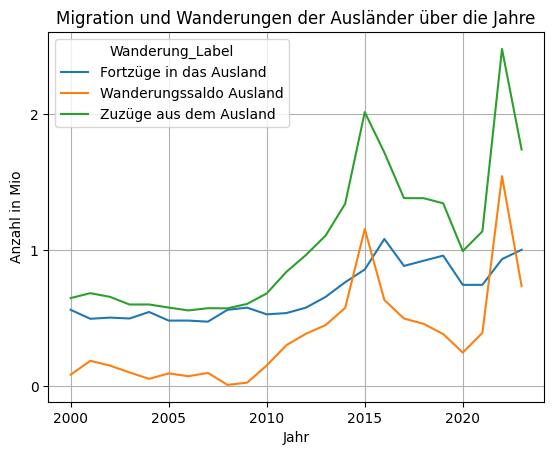

In [13]:
import matplotlib.pyplot as plt

# Liniendiagramm: Wanderung der Ausländer über die Jahre
df_auslaender = df[df["Nationalität"] != "Deutsche"]
# Gruppieren und Pivotieren der Daten
df_auslaender_pivot = df_auslaender.pivot_table(values="Anzahl", index="Jahr", columns="Wanderung_Label", aggfunc="sum")

# Plot erstellen
ax = df_auslaender_pivot.plot(kind="line")
plt.title("Migration und Wanderungen der Ausländer über die Jahre")

# Y-Achse so skalieren, dass sie in Millionen angezeigt wird
ax.set_ylabel('Anzahl in Mio')  # Setzt das Label der Y-Achse auf "Anzahl in Mio"
ax.set_xlabel('Jahr')

# Y-Achse-Ticks formatieren, damit die Werte in Millionen angezeigt werden
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: '{:.0f}'.format(x / 1e6)))

# Optional: Y-Achse-Ticks anpassen, so dass sie in Millionen angezeigt werden
max_y_value = df_auslaender_pivot.max().max() / 1e6  # Maximale Y-Werte in Millionen
yticks = [i for i in range(0, int(max_y_value) + 1)]  # Ticks in Millionen, z.B. 0, 1, 2, 3,...

# Ticks setzen
ax.set_yticks([tick * 1e6 for tick in yticks])  # Umwandlung zurück in volle Zahl

plt.grid(True)
plt.show()

In [ ]:
'''
Gründe für den Anstieg 2015:
Flüchtlingskrise: Flüchtlinge insbesondere aus Ländern wie Syrien, Afghanistan und dem Irak.
Politische Entscheidung von Angela Merkel:
Im Sommer 2015 verkündete die damalige Bundeskanzlerin Angela Merkel die Entscheidung, dass Deutschland eine offene Tür für Flüchtlinge habe 
und viele Menschen aus dem Nahen Osten und Afrika aufnehmen würde, unabhängig von den europäischen Verteilmechanismen. 
Das führte zu einer massiven Steigerung der Zuzüge, da viele Migranten und Flüchtlinge nach Deutschland kamen, um Asyl zu beantragen.
'''

In [ ]:
'''
Gründe für den Anstieg 2022:
1. Russischer Angriff auf die Ukraine (Februar 2022)
2. Auch aus anderen Krisenregionen wie Afghanistan, dem Nahen Osten, Afrika und Südasien gab es weiterhin Flüchtlingsströme.
3. Wirtschaftliche Migration und Arbeitsmigration
Fachkräftemangel und Arbeitsmigration: Deutschland hat aufgrund des demografischen Wandels und des Fachkräftemangels verstärkt Arbeitskräfte aus dem Ausland gesucht.

'''